# SS4202 Term Paper
## Sanchari Ray, Biyas Chowdhury, Barshan Ray

The goal is to implement independent component analysis in denoising magnetometer data from the Quasi-Zenith Satellite-1. The approach mirrors that of the [2021 paper by Imajo et al.](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2020JA028790).   
We begin by importing necessary modules.

## Initial setup and data tabulation

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science','notebook','grid'])

The data for this analysis can be obtained from [the SEES website](https://sees.tksc.jaxa.jp/fw/dfw/SEES/English/Papers/data/2020/peer_reviewed/01/2020_reviewed_01.shtml). We deal with the data from the 23rd and 24th of April, 2012.   
After downloading the data, we have gone ahead and added headers to the `.dat` files.

In [3]:
df1 = pd.read_csv(r'C:\Users\Administrator\Downloads\20120423.dat',delim_whitespace=True)

In [4]:
df1

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335139200,0,196,196,72.2536,514.2604,-181.5397,-541.5745,-109.6227,504.9447,68.0,0,1,0,0,1,0,0
1,1335139201,0,196,196,71.8965,512.8004,-180.3726,-541.9069,-109.7121,504.7570,68.0,0,1,0,0,1,0,0
2,1335139202,0,196,196,71.3952,512.7908,-181.5195,-543.1443,-110.3691,502.1519,68.0,0,1,0,0,1,0,0
3,1335139203,0,196,196,72.7376,512.0435,-180.7793,-542.6016,-110.1126,502.9364,68.0,0,1,0,0,1,0,0
4,1335139204,0,196,196,72.5194,514.2498,-181.1301,-542.6036,-109.7283,503.4656,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,1335225595,0,196,196,73.6716,489.6527,-192.5255,-541.6879,-134.7699,492.3115,68.0,0,1,0,0,1,0,0
86396,1335225596,0,196,196,73.9143,489.0399,-192.5940,-542.2207,-135.1659,492.2889,68.0,0,1,0,0,1,0,0
86397,1335225597,0,196,196,73.4523,488.9537,-193.0436,-541.4630,-134.9693,493.5005,68.0,0,1,0,0,1,0,0
86398,1335225598,0,196,196,73.5664,488.7007,-193.1268,-541.8016,-134.8573,492.0898,68.0,0,1,0,0,1,0,0


In [5]:
df2 = pd.read_csv(r'C:\Users\Administrator\Downloads\20120424.dat',delim_whitespace=True)

In [6]:
df2

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335225600,0,196,196,73.4118,489.6023,-193.5345,-541.7343,-134.7548,492.2484,68.0,0,1,0,0,1,0,0
1,1335225601,0,196,196,73.9776,489.2527,-193.3625,-541.1448,-134.3573,492.8493,68.0,0,1,0,0,1,0,0
2,1335225602,0,196,196,71.8163,488.4766,-193.4202,-543.2318,-135.8522,489.6854,68.0,0,1,0,0,1,0,0
3,1335225603,0,196,196,73.9555,489.9393,-192.4871,-541.0990,-134.4008,494.6407,68.0,0,1,0,0,1,0,0
4,1335225604,0,196,196,74.3033,488.9973,-192.8895,-541.3858,-134.8266,494.2018,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,1335311995,0,196,196,70.7948,504.0819,-184.5903,-544.9388,-118.6849,503.2916,68.0,0,1,0,0,1,0,0
86396,1335311996,0,196,196,69.8900,504.7861,-184.5455,-545.3996,-118.9933,503.7762,68.0,0,1,0,0,1,0,0
86397,1335311997,0,196,196,69.8848,503.5966,-184.5467,-545.8909,-119.5575,501.2701,68.0,0,1,0,0,1,0,0
86398,1335311998,0,196,196,70.2449,506.4825,-184.0611,-545.2545,-118.8743,503.9418,68.0,0,1,0,0,1,0,0


### Combining the two datasets

In [7]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [8]:
df

,UNIXTime,i,j,k,MAM1x,MAM1y,MAM1z,MAM2x,MAM2y,MAM2z,junk,a,b,c,d,e,f,g
0,1335139200,0,196,196,72.2536,514.2604,-181.5397,-541.5745,-109.6227,504.9447,68.0,0,1,0,0,1,0,0
1,1335139201,0,196,196,71.8965,512.8004,-180.3726,-541.9069,-109.7121,504.7570,68.0,0,1,0,0,1,0,0
2,1335139202,0,196,196,71.3952,512.7908,-181.5195,-543.1443,-110.3691,502.1519,68.0,0,1,0,0,1,0,0
3,1335139203,0,196,196,72.7376,512.0435,-180.7793,-542.6016,-110.1126,502.9364,68.0,0,1,0,0,1,0,0
4,1335139204,0,196,196,72.5194,514.2498,-181.1301,-542.6036,-109.7283,503.4656,68.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172795,1335311995,0,196,196,70.7948,504.0819,-184.5903,-544.9388,-118.6849,503.2916,68.0,0,1,0,0,1,0,0
172796,1335311996,0,196,196,69.8900,504.7861,-184.5455,-545.3996,-118.9933,503.7762,68.0,0,1,0,0,1,0,0
172797,1335311997,0,196,196,69.8848,503.5966,-184.5467,-545.8909,-119.5575,501.2701,68.0,0,1,0,0,1,0,0
172798,1335311998,0,196,196,70.2449,506.4825,-184.0611,-545.2545,-118.8743,503.9418,68.0,0,1,0,0,1,0,0


We notice, the dataset deals with UNIX time. We convert these to Python `datetime` objects to deal with them better.

In [9]:
timestamps=df['UNIXTime']
times=[datetime.datetime.fromtimestamp(i) for i in timestamps]

## Data preprocessing

We extract channel data and correct them by the offset provided by the data source website.

In [10]:
XS1=df['MAM1x']
XS1=np.array(XS1)
XS1=XS1-60

ZS1=df['MAM1z']
ZS1=np.array(ZS1)
ZS1=ZS1+202

YS1=df['MAM1y']
YS1=np.array(YS1)
YS1=YS1-410

S1=np.array([XS1,YS1,ZS1]).transpose()

In [11]:
XS2=df['MAM2x']
XS2=np.array(XS2)
XS2=XS2+528

ZS2=df['MAM2z']
ZS2=np.array(ZS2)
ZS2=ZS2-474

YS2=df['MAM2y']
YS2=np.array(YS2)
YS2=YS2+200

S2=np.array([XS2,YS2,ZS2]).transpose()

## Data visualisation

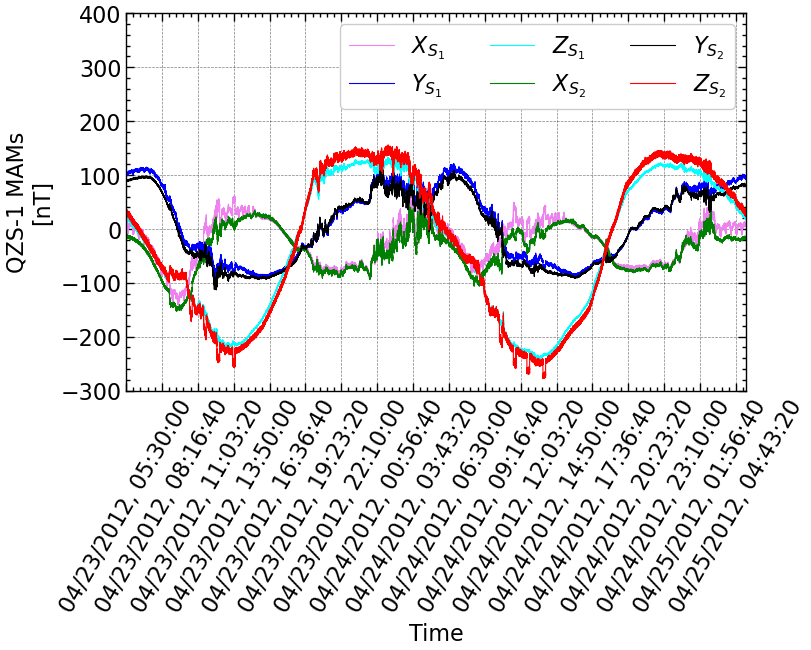

In [60]:
plt.rcParams["figure.figsize"]=[8,4.9]

plt.xticks(ticks=range(1335139200,1335311999,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[::10000]]],rotation=60)
plt.xlim(1335139200,1335311999)
plt.ylim(-300,400)

plt.plot(timestamps,XS1,'violet',lw=0.8,label="$X_{S_1}$")
plt.plot(timestamps,YS1,'blue',lw=0.8,label="$Y_{S_1}$")
plt.plot(timestamps,ZS1,'cyan',lw=0.8,label="$Z_{S_1}$")

# plt.plot(timestamps,S1,lw=0.8)

plt.plot(timestamps,XS2,'green',lw=0.8,label="$X_{S_2}$")
plt.plot(timestamps,YS2,'black',lw=0.8,label="$Y_{S_2}$")
plt.plot(timestamps,ZS2,'red',lw=0.8,label="$Z_{S_2}$")

# plt.plot(timestamps,S2,lw=0.8)

plt.legend(loc="upper right", ncol=3)
plt.ylabel("QZS-1 MAMs\n[nT]")
plt.xlabel("Time")

plt.show()

## Data processing

### Finding data trends

In [13]:
trend_datax=[[np.mean(XS1[i:i+3600]) for i in range(len(XS1)-3600)],[np.mean(XS2[i:i+3600]) for i in range(len(XS2)-3600)]]

In [14]:
trend_datax=np.array(trend_datax).transpose()

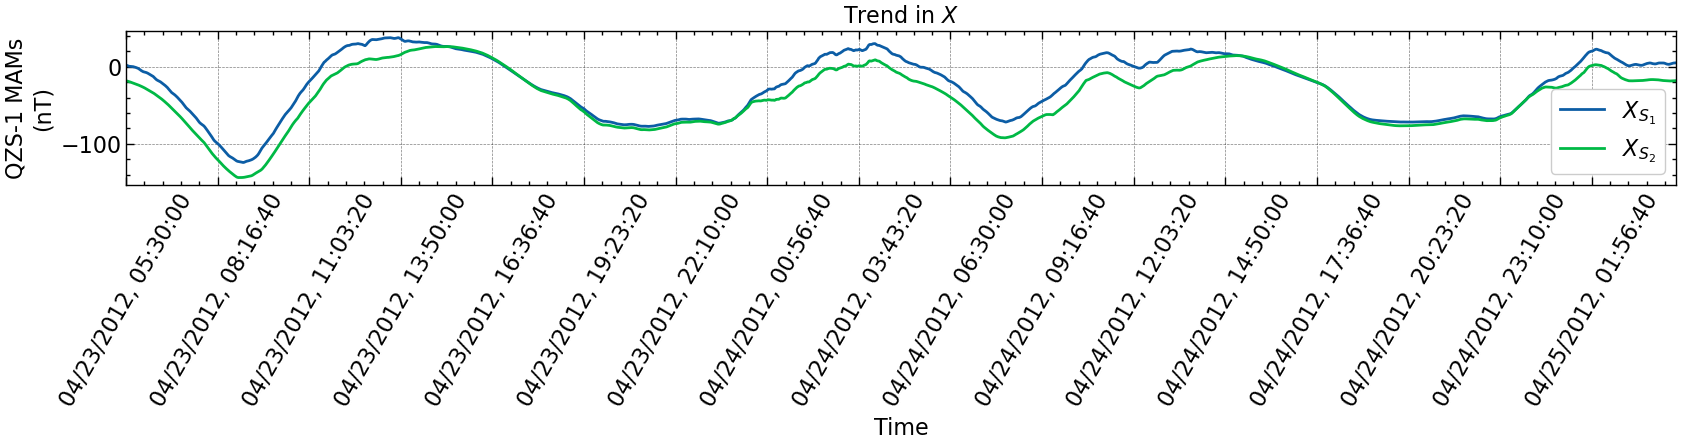

In [65]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $X$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.legend(["$X_{S_1}$","$X_{S_2}$"])
plt.plot(timestamps[:-3600],trend_datax)
plt.show()

In [16]:
trend_datay=[[np.mean(YS1[i:i+3600]) for i in range(len(YS1)-3600)],[np.mean(YS2[i:i+3600]) for i in range(len(YS2)-3600)]]

In [17]:
trend_datay=np.array(trend_datay).transpose()

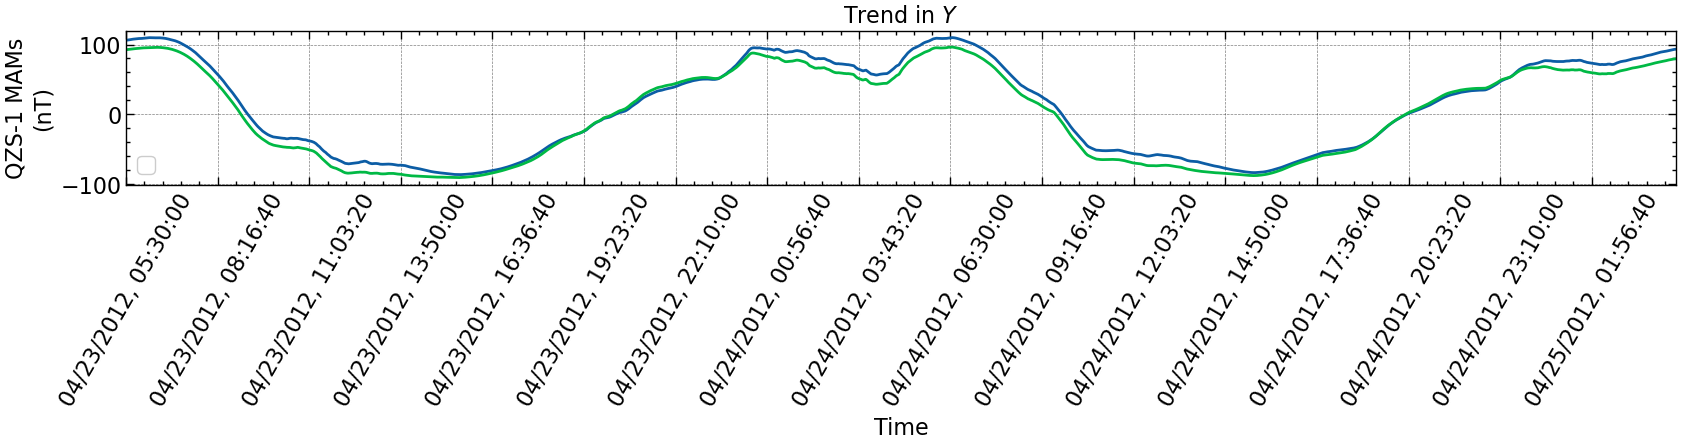

In [66]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $Y$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.legend(["$Y_{S_1}$","$Y_{S_2}$"])
plt.plot(timestamps[:-3600],trend_datay)
plt.show()

In [19]:
trend_dataz=[[np.mean(ZS1[i:i+3600]) for i in range(len(ZS1)-3600)],[np.mean(ZS2[i:i+3600]) for i in range(len(ZS2)-3600)]]

In [20]:
trend_dataz=np.array(trend_dataz).transpose()

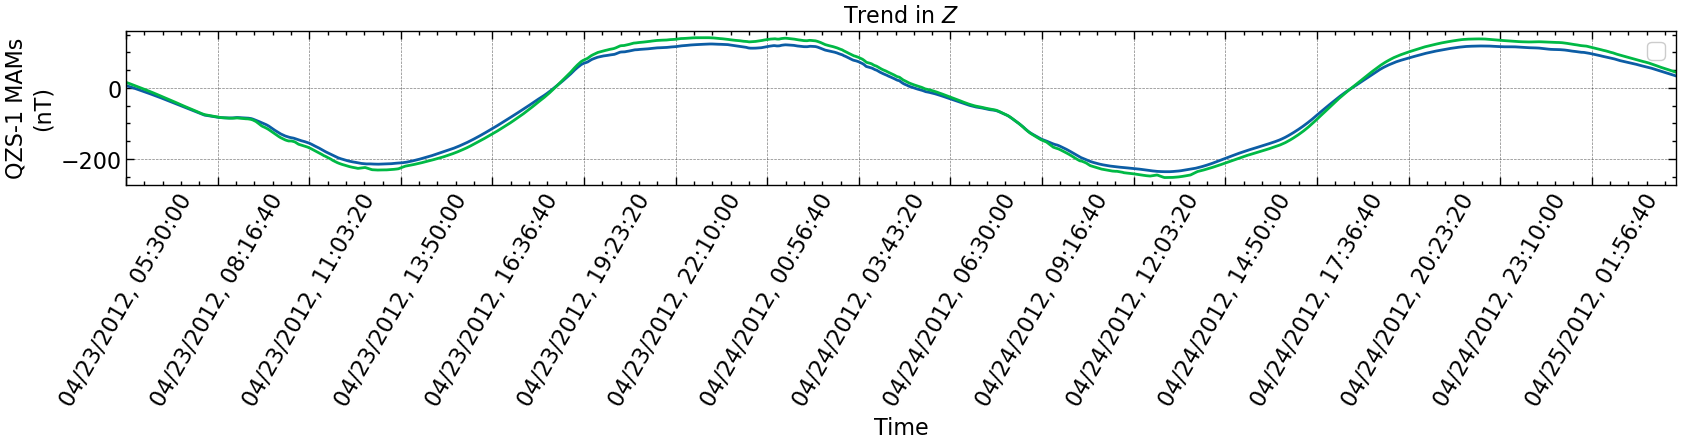

In [68]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.title("Trend in $Z$")
plt.xlabel("Time")
plt.ylabel("QZS-1 MAMs\n(nT)")
plt.legend(["$Z_{S_1}$","$Z_{S_2}$"])
plt.plot(timestamps[:-3600],trend_dataz)
plt.show()

In [22]:
detrended_x=np.array([XS1[:-3600]-trend_datax.transpose()[0],XS2[:-3600]-trend_datax.transpose()[1]]).transpose()

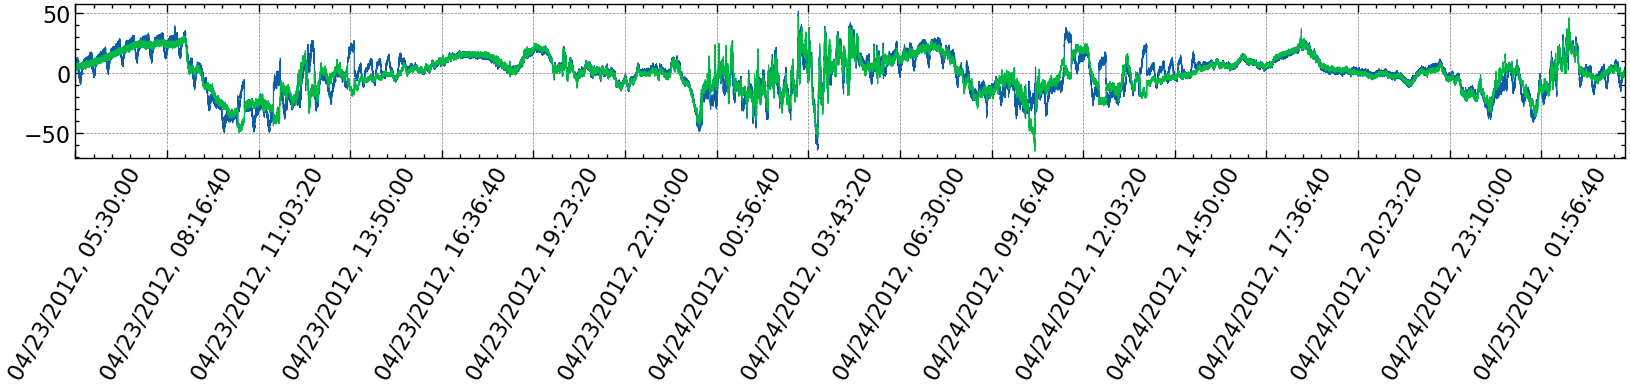

In [23]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_x,lw=0.8)

In [24]:
detrended_y=np.array([YS1[:-3600]-trend_datay.transpose()[0],YS2[:-3600]-trend_datay.transpose()[1]]).transpose()

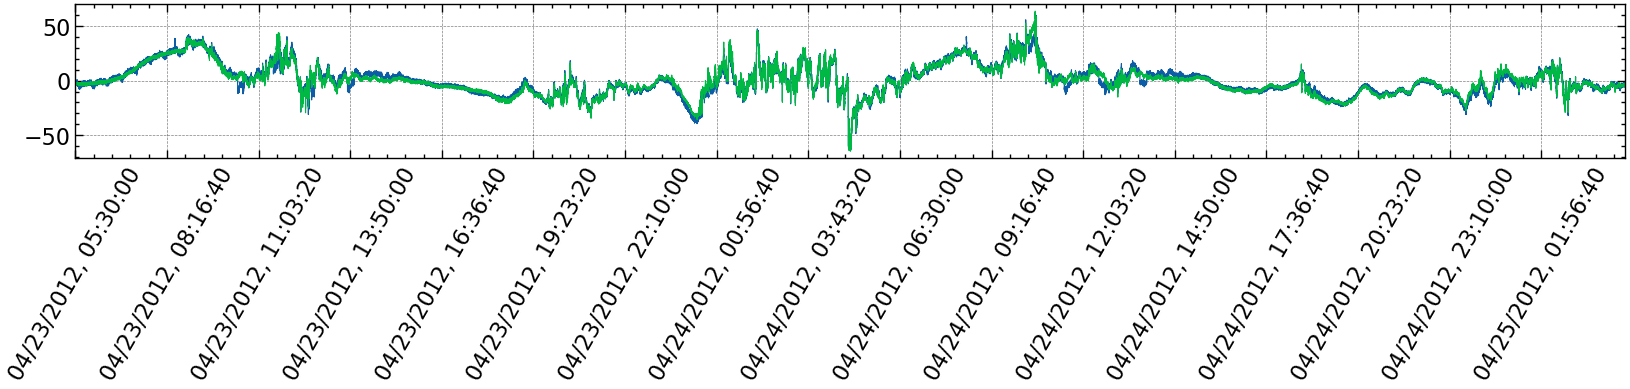

In [25]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_y,lw=0.8)

In [26]:
detrended_z=np.array([ZS1[:-3600]-trend_dataz.transpose()[0],ZS2[:-3600]-trend_dataz.transpose()[1]]).transpose()

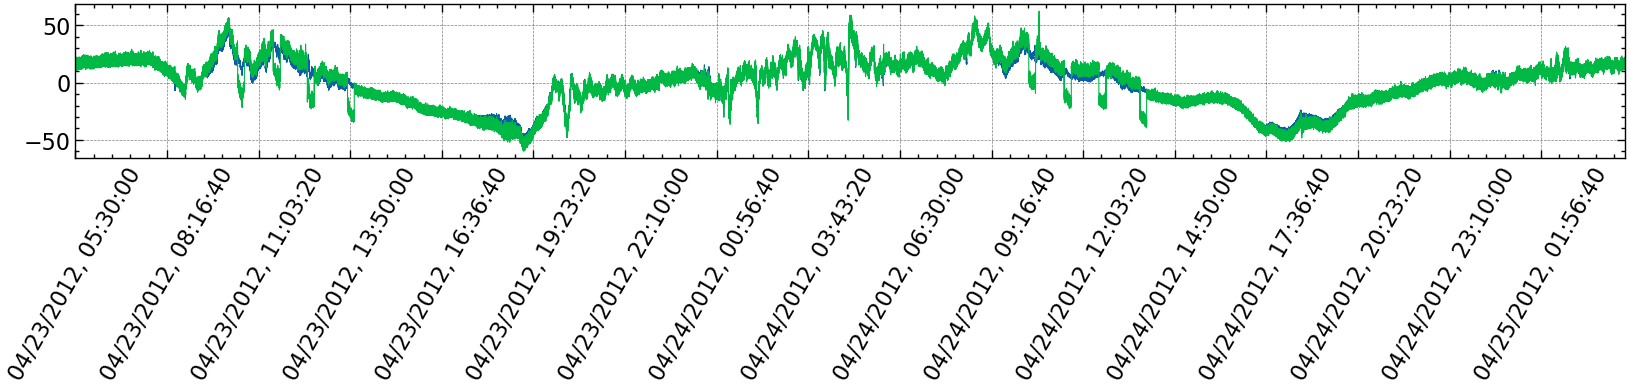

In [27]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.xlim(1335139200,1335308399)
plt.plot(timestamps[:-3600],detrended_z,lw=0.8)

In [28]:
detrended_data=np.concatenate([detrended_x,detrended_y,detrended_z],axis=1)

In [29]:
detrended_data.transpose()

array([[ 9.93039283,  9.58151864,  9.08856153, ...,  3.8075755 ,
         3.49277406,  4.25388522],
       [ 4.66583592,  4.33624058,  3.10158725, ...,  2.18383925,
         2.72647522,  2.765085  ],
       [-1.86411675, -3.32568042, -3.33706783, ..., -3.23384272,
        -1.41651814, -1.61699011],
       [-2.18998392, -2.28071392, -2.93902897, ..., -2.80665142,
        -2.28697711, -2.26004794],
       [13.74003461, 14.91516497, 13.77650475, ..., 17.63834642,
        18.12245733, 17.79966522],
       [15.30083789, 15.12157711, 12.52507256, ..., 19.369666  ,
        19.07948636, 21.57528119]])

In [30]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=6,
            random_state=0,
            whiten='unit-variance')
X_transformed = transformer.fit_transform(detrended_data)
mixing_matrix=transformer.mixing_
X_transformed.shape

(169200, 6)

In [31]:
mixing_matrix

array([[  3.14151031,   3.32176495,  -1.69284837,  -5.75658774,
        -13.3454245 ,  -1.63906147],
       [  3.66040257,  -0.87822222,  -1.57629871,  -4.83690667,
        -12.17086374,   4.97965436],
       [  0.06715969,   0.82065543,   8.46006187,   9.81764204,
         -3.83138189,  -0.11484429],
       [ -1.03178459,  -0.71895425,   7.77046701,   9.85139931,
         -4.01599757,  -2.0510277 ],
       [ -6.80501989,  -4.47263891,  15.80224481,  -2.85961198,
          3.94179973,  -2.69525187],
       [ -9.15871149,  -3.8012266 ,  17.7468363 ,  -2.35283412,
          4.15302515,   2.51372864]])

In [32]:
A_clean=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        if j==0 or j==4 or j==5:
            A_clean[i][j]=0
        else:
            A_clean[i][j]=mixing_matrix[i][j]

In [33]:
A_clean

array([[ 0.        ,  3.32176495, -1.69284837, -5.75658774,  0.        ,
         0.        ],
       [ 0.        , -0.87822222, -1.57629871, -4.83690667,  0.        ,
         0.        ],
       [ 0.        ,  0.82065543,  8.46006187,  9.81764204,  0.        ,
         0.        ],
       [ 0.        , -0.71895425,  7.77046701,  9.85139931,  0.        ,
         0.        ],
       [ 0.        , -4.47263891, 15.80224481, -2.85961198,  0.        ,
         0.        ],
       [ 0.        , -3.8012266 , 17.7468363 , -2.35283412,  0.        ,
         0.        ]])

In [34]:
filter_matrix=np.matmul(A_clean,np.linalg.inv(mixing_matrix))

In [35]:
filter_matrix

array([[ 0.58794778, -0.45665038,  0.51021698, -0.96629538, -0.21545573,
         0.29185055],
       [ 0.01731892,  0.13811243, -0.29917792, -0.07376648,  0.2222415 ,
        -0.09787236],
       [-0.17187251, -0.07319316,  1.43405205, -0.55174749,  0.18521768,
        -0.15315153],
       [-0.37139867,  0.13722417,  1.0074639 , -0.132938  ,  0.28991587,
        -0.26559587],
       [-0.5408437 ,  0.86814104,  2.28314519, -2.10159705,  2.25747667,
        -1.2623788 ],
       [-0.47127729,  0.79456669,  2.76635777, -2.50675289,  2.34619086,
        -1.28465094]])

In [36]:
data_clean=np.matmul(filter_matrix,detrended_data.transpose())

In [37]:
data_clean

array([[ 6.37815275,  5.35999422,  5.75182242, ...,  4.15626223,
         3.95945792,  5.05896115],
       [ 3.09172039,  3.76282487,  3.63680334, ...,  3.56630719,
         3.18975211,  2.95024941],
       [-3.31164055, -5.02834389, -4.31959777, ..., -3.60275593,
        -1.13485104, -2.01285804],
       [-4.71515283, -5.70292118, -5.25371393, ..., -4.03018895,
        -1.85958294, -3.09896397],
       [10.72858199, 10.3639734 , 11.6235202 , ..., 13.71799495,
        18.87559349, 14.10383501],
       [11.9407917 , 11.01492004, 12.54904442, ..., 14.53006526,
        20.34285557, 15.42920017]])

In [38]:
plt.rcParams["figure.figsize"]=[20,2]

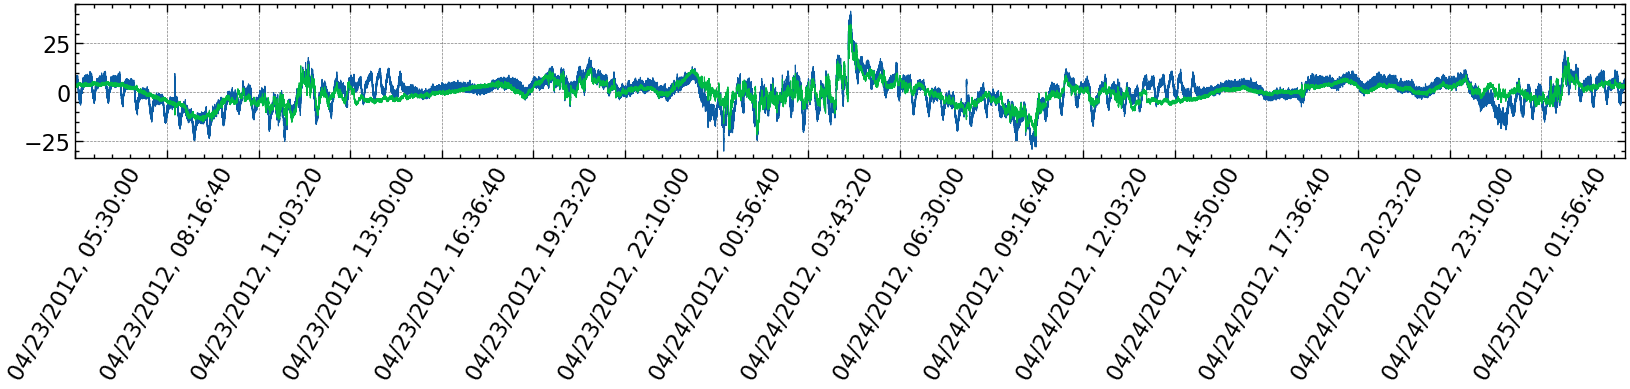

In [39]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],data_clean[0],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[1],lw=0.8)

In [40]:
detrended_cleanx=np.concatenate([data_clean[0].reshape(-1,1),data_clean[1].reshape(-1,1)],axis=1)

In [41]:
trend_x_clean=trend_datax+detrended_cleanx

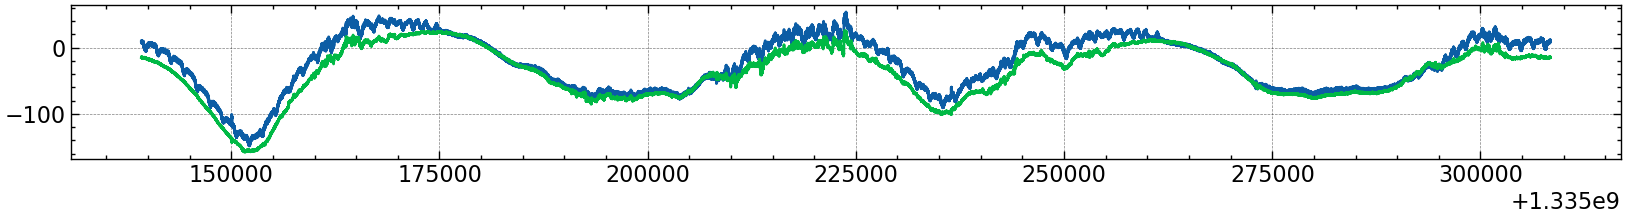

In [42]:
plt.plot(timestamps[:-3600],trend_x_clean)

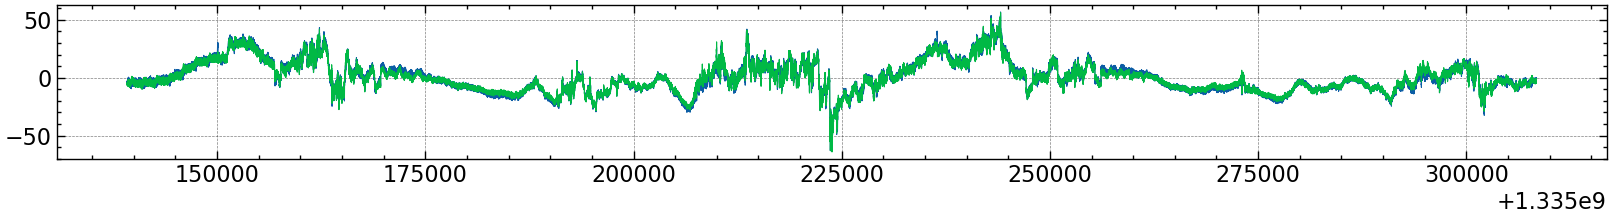

In [43]:
plt.plot(timestamps[:-3600],data_clean[2],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[3],lw=0.8)

In [44]:
detrended_cleany=np.concatenate([data_clean[2].reshape(-1,1),data_clean[3].reshape(-1,1)],axis=1)

In [45]:
trend_y_clean=trend_datay+detrended_cleany

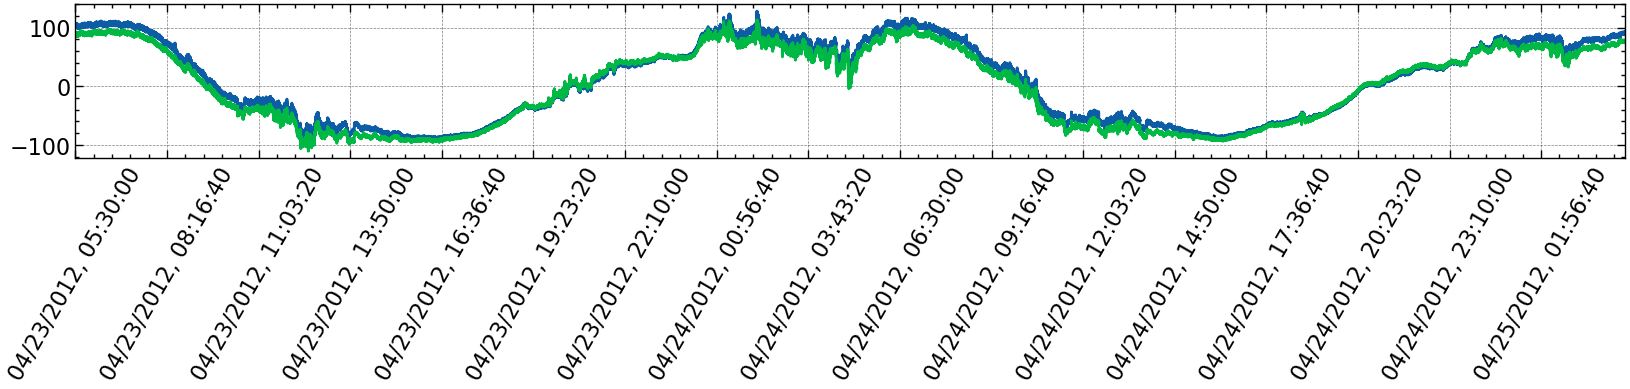

In [46]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],trend_y_clean)

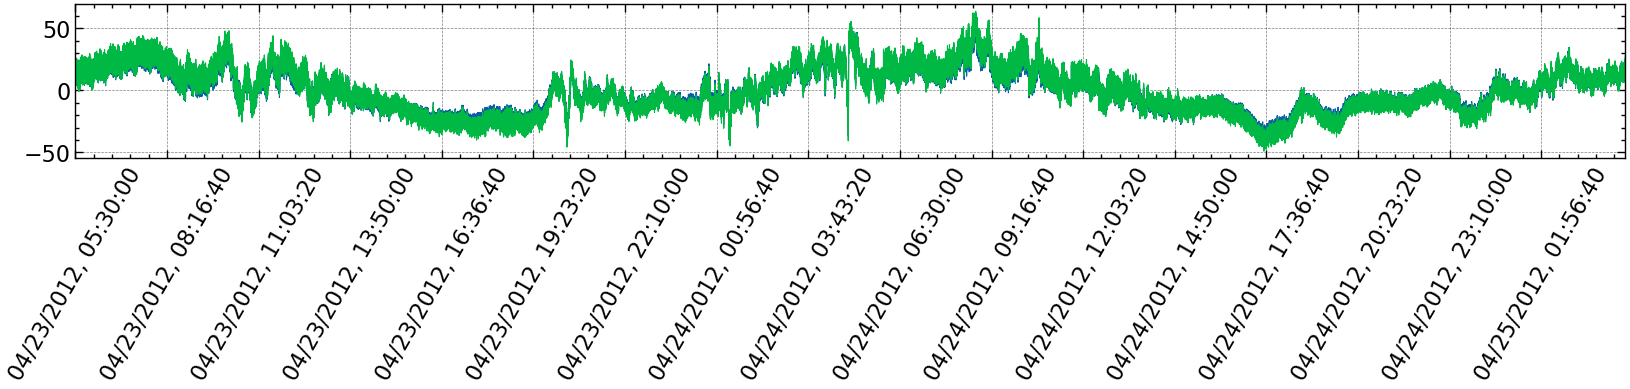

In [47]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],data_clean[4],lw=0.8)
plt.plot(timestamps[:-3600],data_clean[5],lw=0.8)

In [48]:
detrended_cleanz=np.concatenate([data_clean[4].reshape(-1,1),data_clean[5].reshape(-1,1)],axis=1)

In [49]:
trend_z_clean=trend_dataz+detrended_cleanz

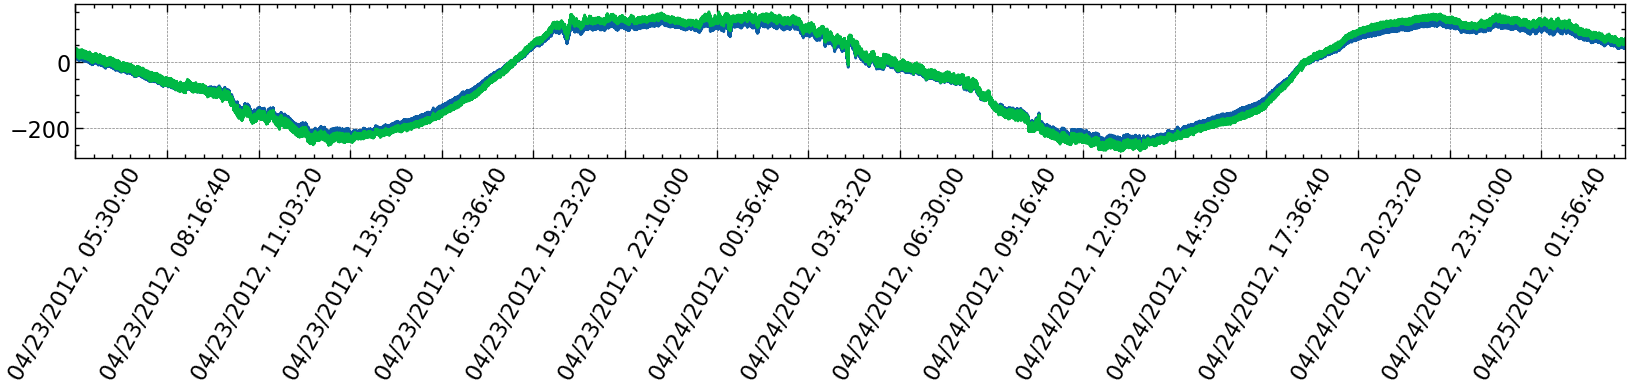

In [50]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],trend_z_clean)

In [51]:
X_transformed

array([[-0.59446692,  0.59005504,  0.68238064, -0.98629248, -0.3757849 ,
        -0.18659481],
       [-0.76694001,  0.1799797 ,  0.54000284, -1.00418352, -0.43857657,
        -0.41424268],
       [-0.25519515,  0.2995217 ,  0.64796475, -1.03501792, -0.23836838,
        -0.52371159],
       ...,
       [-0.60391368, -0.04854105,  0.69338749, -0.97204941, -0.09724779,
        -0.09260582],
       [ 0.16234637, -0.00490203,  1.02520833, -1.01025946,  0.08405479,
        -0.02814756],
       [-0.682838  ,  0.32052771,  0.82540152, -0.95471605, -0.11342722,
         0.16630387]])

In [52]:
X_transformed.transpose()[0]

array([-0.59446692, -0.76694001, -0.25519515, ..., -0.60391368,
        0.16234637, -0.682838  ])

In [53]:
[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]]

['04/23/2012, 05:30:00',
 '04/23/2012, 08:16:40',
 '04/23/2012, 11:03:20',
 '04/23/2012, 13:50:00',
 '04/23/2012, 16:36:40',
 '04/23/2012, 19:23:20',
 '04/23/2012, 22:10:00',
 '04/24/2012, 00:56:40',
 '04/24/2012, 03:43:20',
 '04/24/2012, 06:30:00',
 '04/24/2012, 09:16:40',
 '04/24/2012, 12:03:20',
 '04/24/2012, 14:50:00',
 '04/24/2012, 17:36:40',
 '04/24/2012, 20:23:20',
 '04/24/2012, 23:10:00',
 '04/25/2012, 01:56:40']

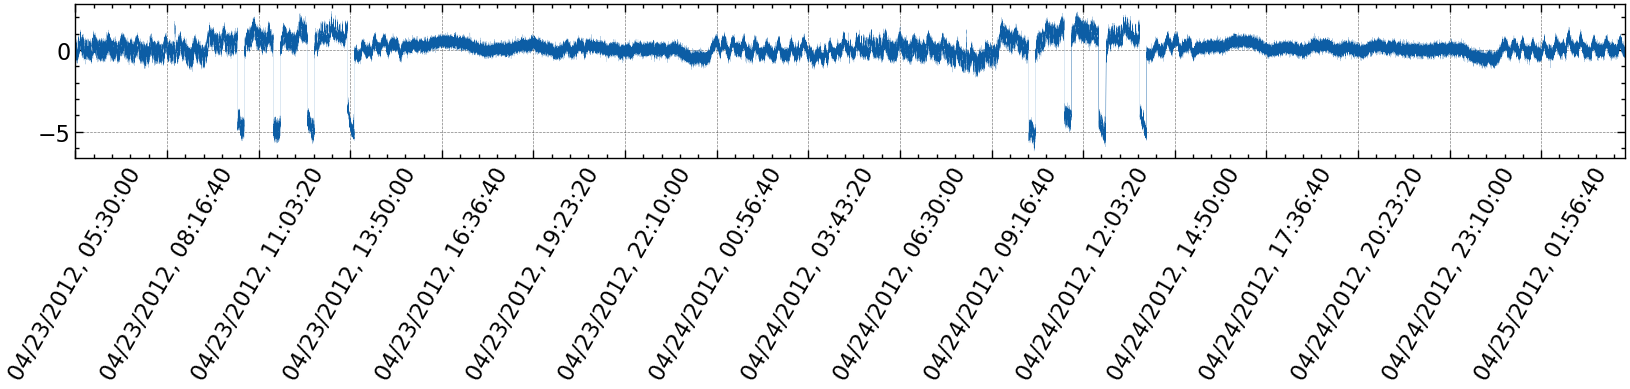

In [54]:
plt.rcParams["figure.figsize"]=[20,2]
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
plt.plot(timestamps[:-3600],X_transformed.transpose()[5],lw=0.1)

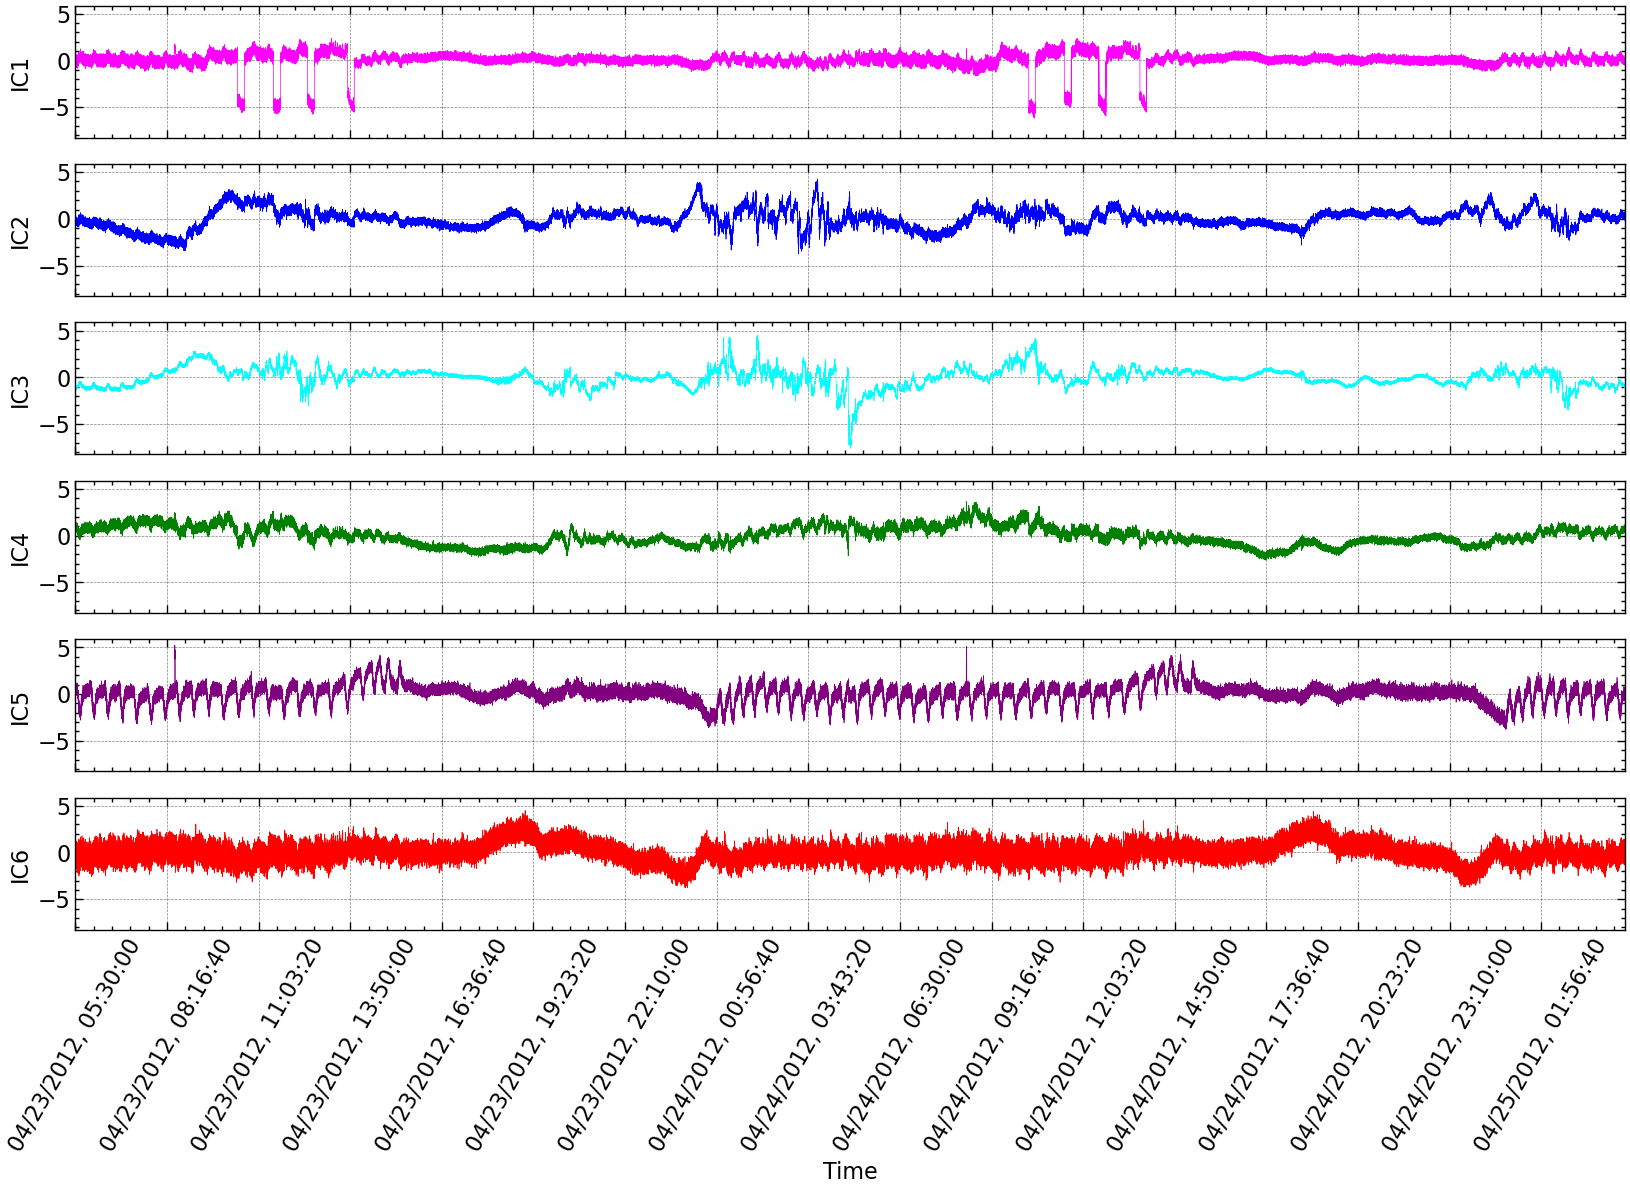

In [55]:
plt.rcParams["figure.figsize"]=[20,12]
fig, axs = plt.subplots(6,sharex=True,sharey=True)
# fig.suptitle('Independent Components')
plt.xlim(1335139200,1335308399)
plt.xticks(ticks=range(1335139200,1335308399,10000),labels=[i.strftime("%m/%d/%Y, %H:%M:%S") for i in [datetime.datetime.fromtimestamp(i) for i in timestamps[:-3600:10000]]],rotation=60)
axs[0].plot(timestamps[:-3600],X_transformed.transpose()[5],'magenta',lw=0.5)
axs[0].set(ylabel="IC1")
axs[1].plot(timestamps[:-3600],X_transformed.transpose()[4],'blue',lw=0.5)
axs[1].set(ylabel="IC2")
axs[2].plot(timestamps[:-3600],X_transformed.transpose()[3],'cyan',lw=0.5)
axs[2].set(ylabel="IC3")
axs[3].plot(timestamps[:-3600],X_transformed.transpose()[2],'green',lw=0.5)
axs[3].set(ylabel="IC4")
axs[4].plot(timestamps[:-3600],X_transformed.transpose()[1],'purple',lw=0.5)
axs[4].set(ylabel="IC5")
axs[5].plot(timestamps[:-3600],X_transformed.transpose()[0],'red',lw=0.5)
axs[5].set(ylabel="IC6")
plt.xlabel("Time")
plt.savefig("independent-components.png",dpi=300)